# **Model Interpretability**

-> The interpretability of a machine learning algorithm describes how simple it is for humans to comprehend the methods it employs to get its results. Until recently, AI algorithms were renowned for being "black boxes," with no means to comprehend their inner workings and making it impossible to communicate subsequent insights to regulatory bodies and stakeholders.

*Why is Model Interpretability important ?*

-> Knowing which aspects the model considered and ignored is crucial when utilizing the results of an algorithm to make critical judgments. Furthermore, the business might not be able to leverage the insights from a model to alter procedures if it is not easily interpretable. It is crucial to be able to comprehend the aspects that contribute to anticipated outcomes in highly regulated businesses like banking, insurance, and healthcare in order to adhere to regulations and industry best practices.

*Problem statement :*
To create a model for predicting the likelihood that a patient has lung cancer using a number of risk factors.

This dataset includes a list of lung cancer risk factors. This dataset is used to predict a patient's likelihood of developing lung cancer based on the input values provided below. The table's rows of data each provide relevant details about the patient.

*Importing necassary libraries*

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance
file ='RiskFactors.csv'

*Loading and checking the data*

In [ ]:
df = pd.read_csv(file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55394 entries, 0 to 55393
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 55394 non-null  int64
 1   AGE                    55394 non-null  int64
 2   SMOKING                55394 non-null  int64
 3   YELLOW_FINGERS         55394 non-null  int64
 4   ANXIETY                55394 non-null  int64
 5   PEER_PRESSURE          55394 non-null  int64
 6   CHRONIC_DISEASE        55394 non-null  int64
 7   FATIGUE                55394 non-null  int64
 8   ALLERGY                55394 non-null  int64
 9   WHEEZING               55394 non-null  int64
 10  ALCOHOL_CONSUMING      55394 non-null  int64
 11  COUGHING               55394 non-null  int64
 12  SHORTNESS_OF_BREATH    55394 non-null  int64
 13  SWALLOWING_DIFFICULTY  55394 non-null  int64
 14  CHEST_PAIN             55394 non-null  int64
 15  LUNG_CANCER            55394 non-nul

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


*Splitting the data into Training and Testing subsets*

In [ ]:
y= df.LUNG_CANCER

In [ ]:
x = df.drop('LUNG_CANCER',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

*Building the Linear Model :*

In [ ]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
odds = reg.coef_[0]
pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
             .sort_values(by='coef',ascending=False)

,coef
CHEST_PAIN,0.028167
GENDER,0.027921
SWALLOWING_DIFFICULTY,0.026374
ANXIETY,0.011342
SHORTNESS_OF_BREATH,0.007223
CHRONIC_DISEASE,0.002352
AGE,0.000415
WHEEZING,-0.004399
SMOKING,-0.006465
FATIGUE,-0.010983


In [ ]:
l_odds = np.exp(reg.coef_[0])
pd.DataFrame(l_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
CHEST_PAIN,1.028568
GENDER,1.028315
SWALLOWING_DIFFICULTY,1.026725
ANXIETY,1.011406
SHORTNESS_OF_BREATH,1.007250
CHRONIC_DISEASE,1.002355
AGE,1.000415
WHEEZING,0.995610
SMOKING,0.993556
FATIGUE,0.989077


1. Fit a linear model and interpret the regression coefficients

   The chances of having lung cancer in the target class ("2") rise by more than 1x (i.e. 1.030) in comparison to the odds of not having lung cancer in the target class when the variable CHEST PAIN is increased by one unit. In comparison, the risk of lung cancer in the target class increases only by 0.949 as PEER PRESSURE concentration increases by one unit.

Building the Tree-based Model

In [ ]:
tbm = xgb.XGBClassifier(random_state=0)
tbm.fit(x_train, y_train)

XGBClassifier()

In [ ]:
pred = tbm.predict(x_test)
print(accuracy_score(y_test, pred))

0.5002707744148264


2. Fit a tree-based model and interpret the nodes

   The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'AGE'. Node interpretability for first 3 trees is shown below.

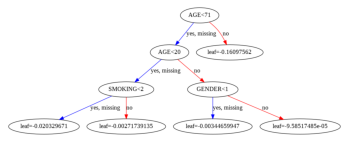

In [ ]:
xgb.plot_tree(tbm,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [ ]:
xgb.plot_tree(tbm,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [ ]:
xgb.plot_tree(tbm,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

*Using AUTO ML to find the best model*

In [ ]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.4 MB 38 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=1364b09b19b7782f2b8d3f144972ed77cd5423ca52938f22b250bed9bf1f8cd5
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [ ]:
min_mem_size=6 
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
port_no=random.randint(5555,55555)
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:42722 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp__ppn5q4
  JVM stdout: /tmp/tmp__ppn5q4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp__ppn5q4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:42722
Connecting to H2O server at http://127.0.0.1:42722 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_hpeb5m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
risk_df = h2o.import_file('RiskFactors.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
risk_df.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [ ]:
risk_df.types

{'GENDER': 'int',
 'AGE': 'int',
 'SMOKING': 'int',
 'YELLOW_FINGERS': 'int',
 'ANXIETY': 'int',
 'PEER_PRESSURE': 'int',
 'CHRONIC_DISEASE': 'int',
 'FATIGUE': 'int',
 'ALLERGY': 'int',
 'WHEEZING': 'int',
 'ALCOHOL_CONSUMING': 'int',
 'COUGHING': 'int',
 'SHORTNESS_OF_BREATH': 'int',
 'SWALLOWING_DIFFICULTY': 'int',
 'CHEST_PAIN': 'int',
 'LUNG_CANCER': 'int'}

In [ ]:
risk_df['LUNG_CANCER'] = risk_df['LUNG_CANCER'].asfactor()
print(risk_df['LUNG_CANCER'].isfactor())

[True]


In [ ]:
risk_df.describe()

Rows:55394
Cols:16

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,0.502003827129292,44.137614182041325,1.4995306350868336,1.4962992381846407,1.5006137848864498,1.4967686030978076,1.5010470448062982,1.4979239628840675,1.5019135646459905,1.5010650973029576,1.4984474852872165,1.5050546990648797,1.500758204859733,1.49996389500668,1.5016427771960865,
maxs,1.0,87.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
sigma,0.5000004978097399,15.309217494376208,0.5000042928798124,0.4999908172360575,0.5000041364498418,0.49999407105604166,0.5000034168713465,0.5000002031976855,0.5000008514091558,0.5000033787414793,0.5000021028557717,0.49997896231916983,0.5000039383051423,0.5000045118816887,0.5000018144367121,
zeros,27586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,0.0,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1
2,1.0,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2


In [ ]:
risk_df.shape

(55394, 16)

In [ ]:
pct_rows=0.80
risk_train, risk_test = risk_df.split_frame([pct_rows])

In [ ]:
print(risk_train.shape)
print(risk_test.shape)

(44384, 16)
(11010, 16)


In [ ]:
risk_df.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [ ]:
D=risk_df.columns
print(D)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


In [ ]:
t ='LUNG_CANCER'
D.remove(t)
print(D)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']


In [ ]:
ml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
ml.train(x=D,y=t,training_frame=risk_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20221119_231736


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.19990913071977454
RMSE: 0.4471119890136861
LogLoss: 0.5869716380206821
Mean Per-Class Error: 0.3065264533051455
AUC: 0.7799383021321414
AUCPR: 0.7722702240374721
Gini: 0.5598766042642829

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4385487993972169
       1      2      Error    Rate
-----  -----  -----  -------  -----------------
1      12475  9912   0.4428   (9912.0/22387.0)
2      3746   18251  0.1703   (3746.0/21997.0)
Total  16221  28163  0.3077   (13658.0/44384.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.438549     0.727711  239
max f2                       0.311018     0.841166  321
max f0point5                 0.542238     0.711335  168
max accuracy                 0.502088     0.708386  195
max precision                0.931111     1         0
max recall                   0.113891     1         396
max specificity              0.931111     1         0
max absolute_mcc             0.502088     0.416697  195
max min_per_class_accuracy   0.497915     0.707107  198
max mean_per_class_accuracy  0.502088     0.708298  195
max tns                      0.931111     22387     0
max fns                      0.931111     21995     0
max fps                      0.0874437    22387     399
max tps                      0.113891     21997     396
max tnr                      0.931111     1         0
max fnr                      0.931111     0.999909  0
max fpr                      0.0874437    1         399
max tpr                      0.113891     1         396

Gains/Lift Table: Avg response rate: 49.56 %, avg score: 49.67 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100036                   0.818503           1.97229   1.97229            0.977477         0.846124  0.977477                    0.846124            0.01973         0.01973                    97.2285   97.2285            0.0192833
2        0.0200072                   0.791131           1.87685   1.92457            0.93018          0.804222  0.953829                    0.825173            0.0187753       0.0385053                  87.6852   92.4569            0.0366738
3        0.0300108                   0.772281           1.84504   1.89806            0.914414         0.780813  0.940691                    0.810387            0.0184571       0.0569623                  84.5041   89.806             0.0534335
4        0.0400144                   0.757488           1.83595   1.88253            0.90991          0.764862  0.932995                    0.799005            0.0183661       0.0753285                  83.5952   88.2533            0.0700129
5        0.050018                    0.744445           1.78596   1.86322            0.885135         0.751101  0.923423                    0.789425            0.0178661       0.0931945                  78.5963   86.3219            0.0856008
6        0.100014                    0.696341           1.73039   1.79682            0.857594         0.719332  0.890516                    0.754386            0.0865118       0.179706                   73.0392   79.682             0.157997
7        0.150009                    0.662061           1.61764   1.7371       

In [ ]:
print(ml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
XGBoost_1_AutoML_1_20221119_231736                       0.505747   0.739323  0.501818                0.5       0.519839  0.270233
GBM_3_AutoML_1_20221119_231736                           0.504571   0.694838  0.500217                0.499152  0.500863  0.250864
DRF_1_AutoML_1_20221119_231736                           0.504312   0.864549  0.498379                0.5       0.531722  0.282728
GBM_5_AutoML_1_20221119_231736                           0.504004   0.693283  0.498849                0.499151  0.50011   0.25011
XGBoost_3_AutoML_1_20221119_231736                       0.503876   0.696048  0.499194                0.499086  0.501458  0.25146
XGBoost_grid_1_AutoML_1_20221119_231736_model_1          0.503762   0.709607  0.498464                0.499867  0.507718  0.257778
StackedEnsemble_BestOfFamily_2_AutoML_1_20221119_231736  0.503694   0.693042  0.49836

In [ ]:
model_index=0
glm_index=0
glm_model=''
ml_leaderboard_df=ml.leaderboard.as_data_frame()
models_dict={}
for m in ml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in ml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'XGBoost_1_AutoML_1_20221119_231736': 0, 'GLM_1_AutoML_1_20221119_231736': 15}

In [ ]:
print(model_index)
best_model = h2o.get_model(ml.leaderboard[model_index,'model_id'])

0


3. Use auto ml to find the best model

 Using AutoML, we have conclude'GBM' as the best model to determine whether a patient has lung cancer. By referring the below variable importance and shap summary plots, we can say that 'AGE' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'ANXIETY' and 'GENDER' according to variable importance and shap summary plots respectively.

In [ ]:
best_model.algo

'xgboost'

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20221119_231736

,1,2,Error,Rate
1,12475.0,9912.0,0.4428,(9912.0/22387.0)
2,3746.0,18251.0,0.1703,(3746.0/21997.0)
Total,16221.0,28163.0,0.3077,(13658.0/44384.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

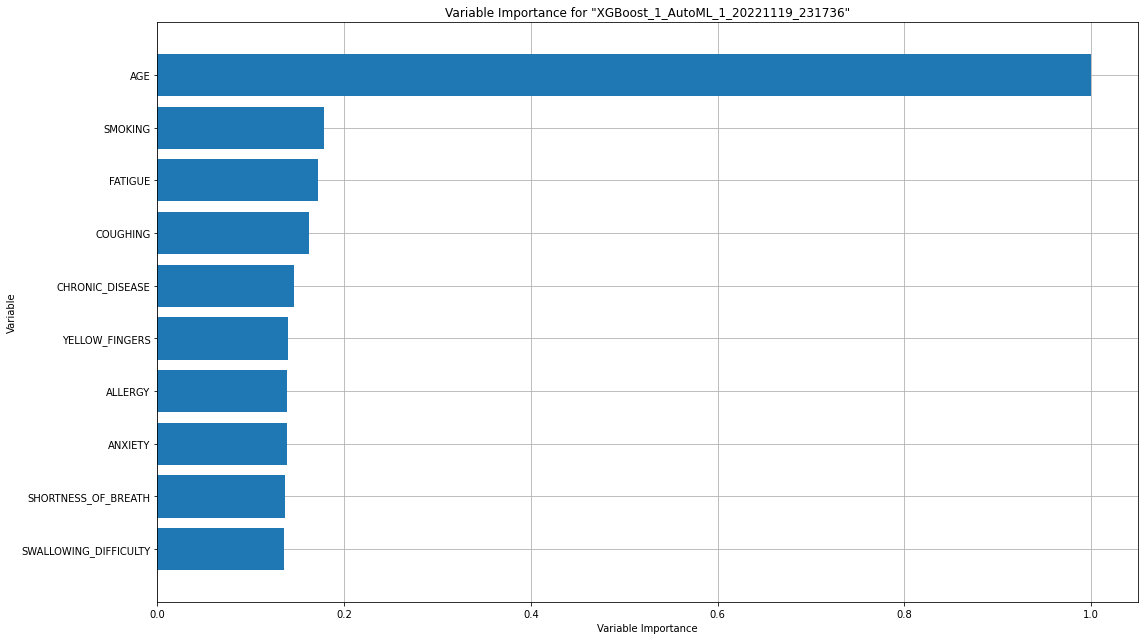

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

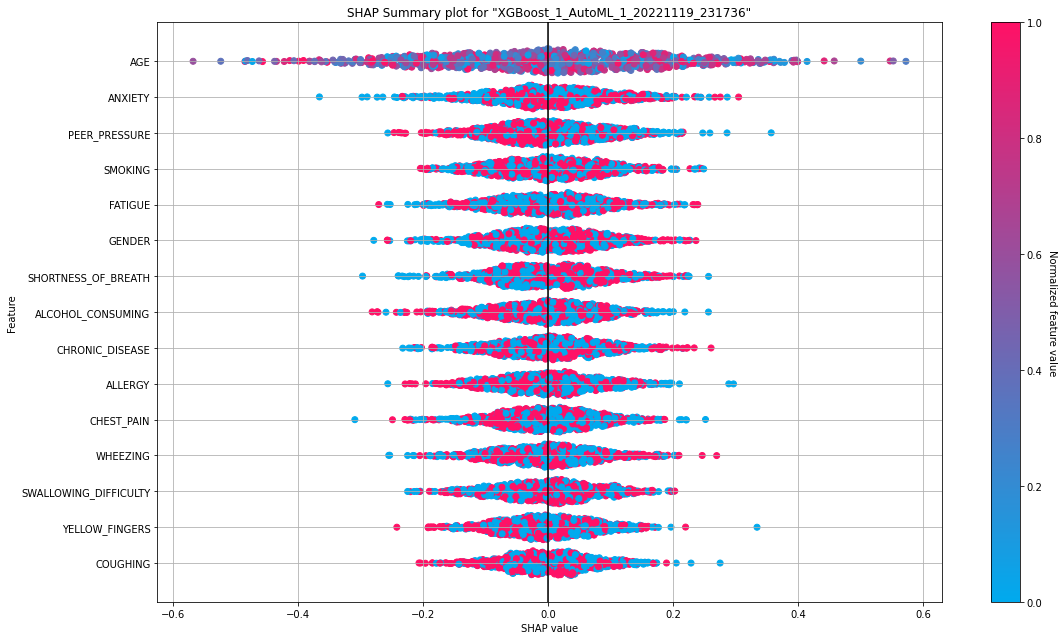

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

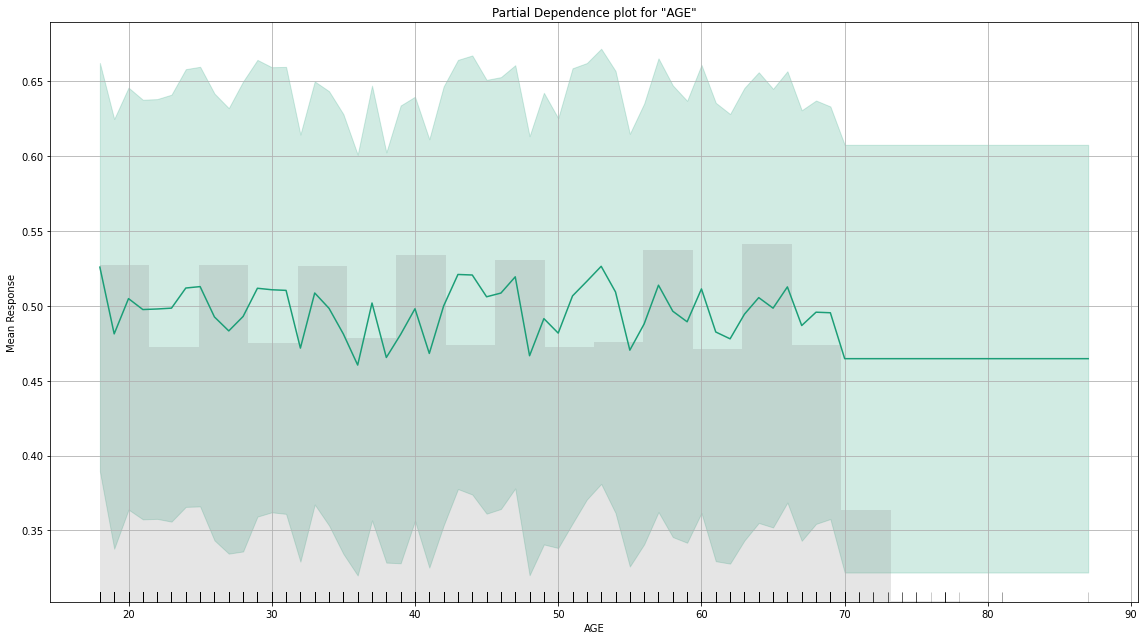

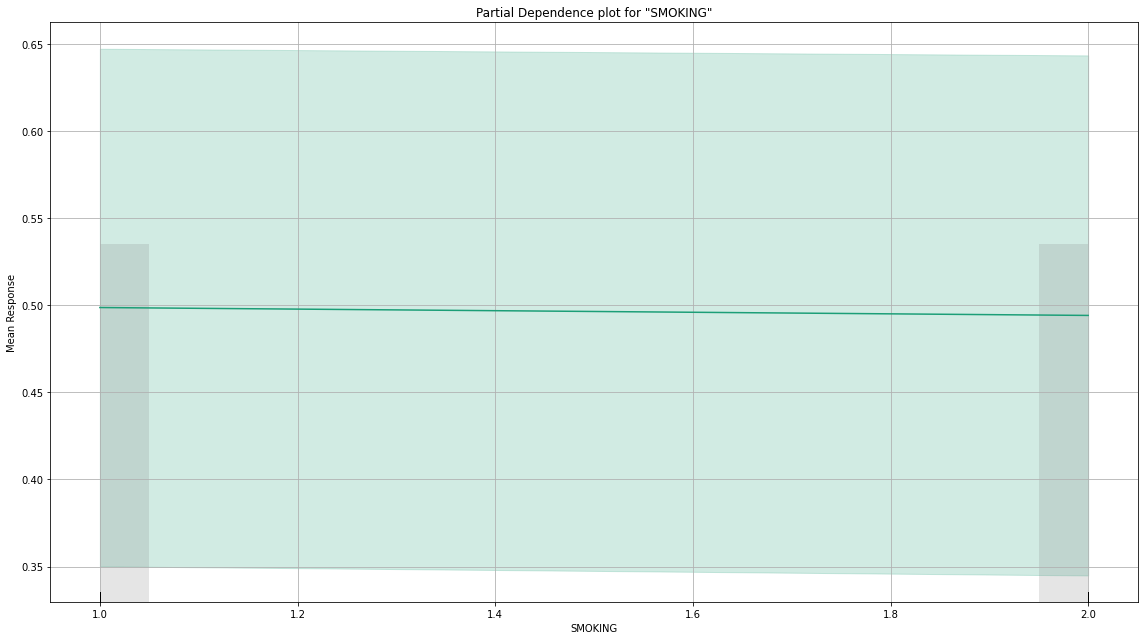

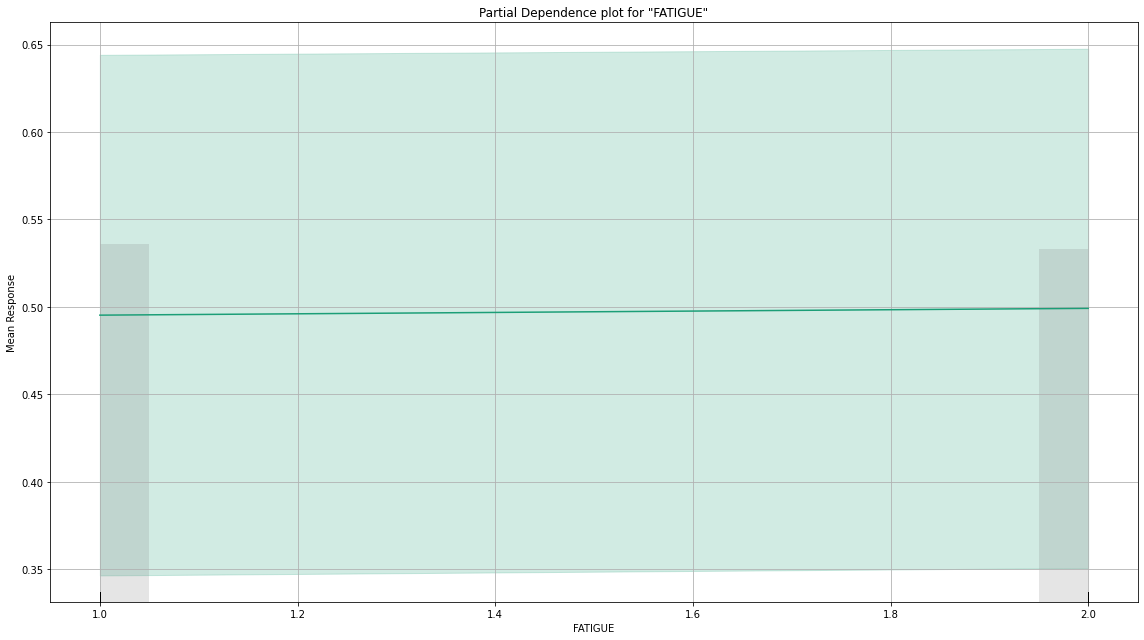

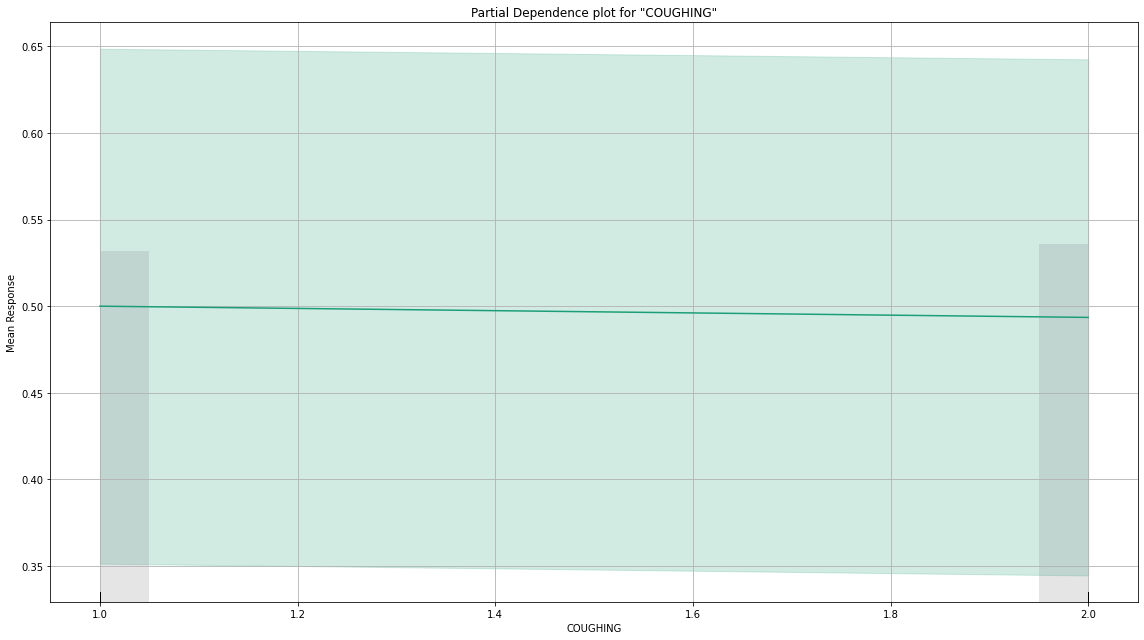

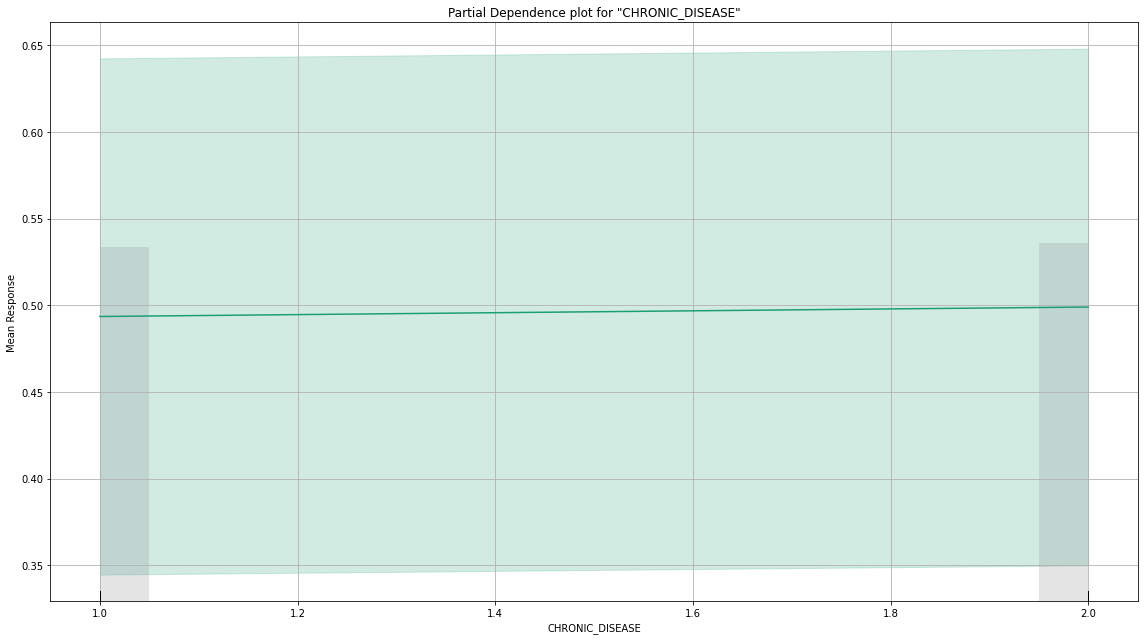

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20221119_231736

,1,2,Error,Rate
1,12475.0,9912.0,0.4428,(9912.0/22387.0)
2,3746.0,18251.0,0.1703,(3746.0/21997.0)
Total,16221.0,28163.0,0.3077,(13658.0/44384.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
best_model.explain(risk_train)

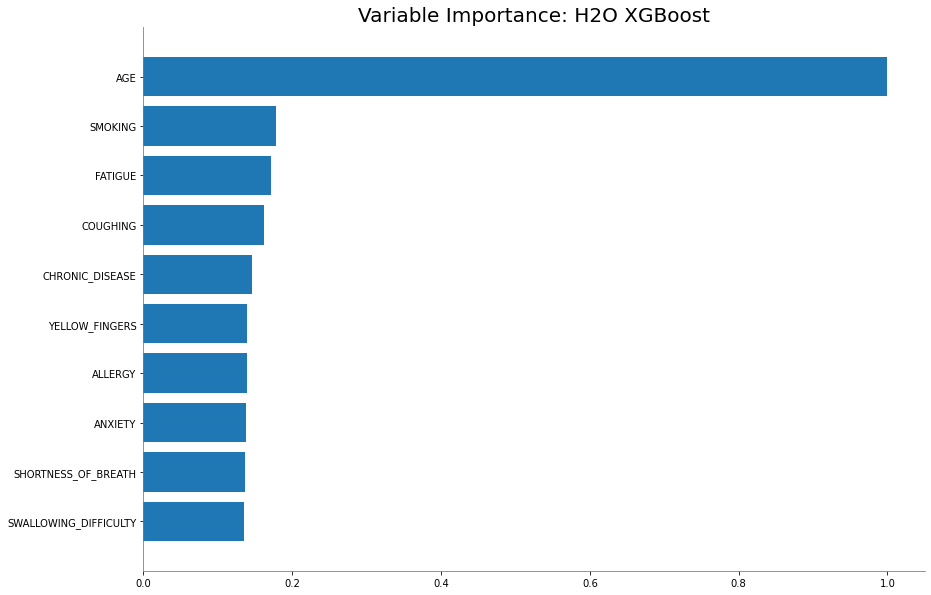

<Figure size 36000x7200 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

15
glm


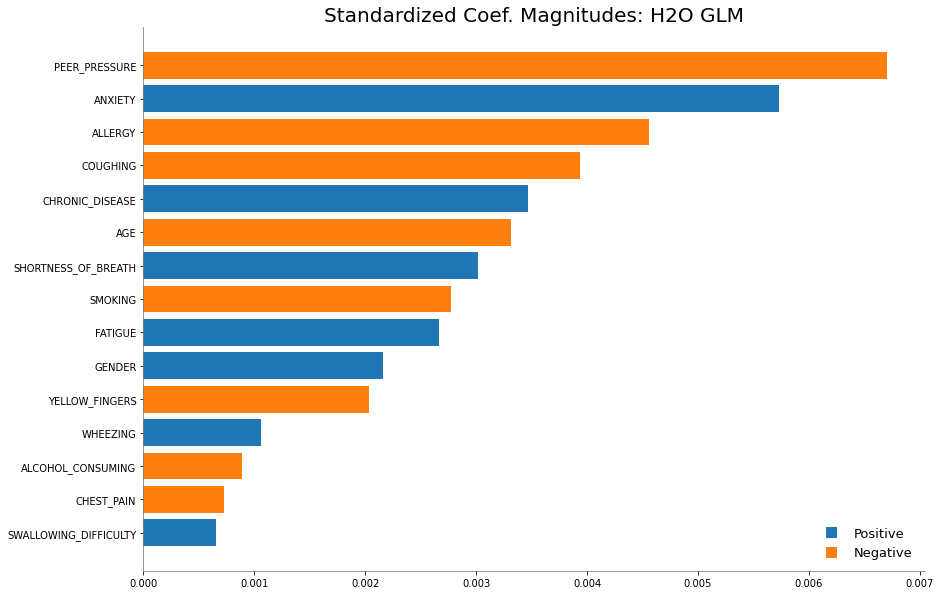

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(ml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [ ]:
print(best_model.auc(train = True))

0.7799383021321414


In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(risk_train)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.1999091306934492,
 'rmse': 0.44711198898424676,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.586971637948965,
 'auc': 0.7799383021321414,
 'gini': 0.5598766042642829}

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.7 MB/s 


4. Run a SHAP analysis on the models from stages 1 through 3; next, analyze the SHAP values and contrast them with those from other model interpretability techniques. 
Ans: 

In the beeswarm and summary plots, we observed that "GENDER" is the top feature in the dataset effecting the model's output, whilst "WHEEZING" is the least relevant feature, following the SHAP analysis on model 1 (i.e., Logistic Regression). A greater value of "GENDER" (2), according to the beeswarm plot, is associated with a decreased risk of lung cancer. Lung cancer risk increases with a lower value of "GENDER" (1). Additionally, productivity is negatively impacted by COUGHING, YELLOW FINGERS, AGE, SMOKING, ALCOHOL CONSUME, and ALLERGY. While the following variables have a favorable effect on the model's output: CHEST PAIN, ANXIETY, CHRONIC DISEASE, SWALLOWING DIFFICULTY, WHEEZING, FATIGUE, SHORTNESS OF BREATH.

The most and least important characteristics that influence the prediction of lung cancer for model 1 (i.e. XGBoost) are, respectively, "AGE" and "SHORTNESS OF BREATH." According to the summary plot, a greater "AGE" number indicates a decreased risk of lung cancer. Lung cancer risk increases with a lower "AGE" number. 

According to model 2 (i.e., GBM), "AGE" is the most significant and dominating feature in the model to forecast the target variable that has a negative influence on output. While "GENDER" is less significant. 

The three algorithms each provide unique outcomes. To improve the model, regularization might be used.

In [ ]:
import shap

*SHAP analysis for Linear model :*

In [ ]:
lg_explainer = shap.Explainer(reg, x_train)
shap_values_lg = lg_explainer(x_test)

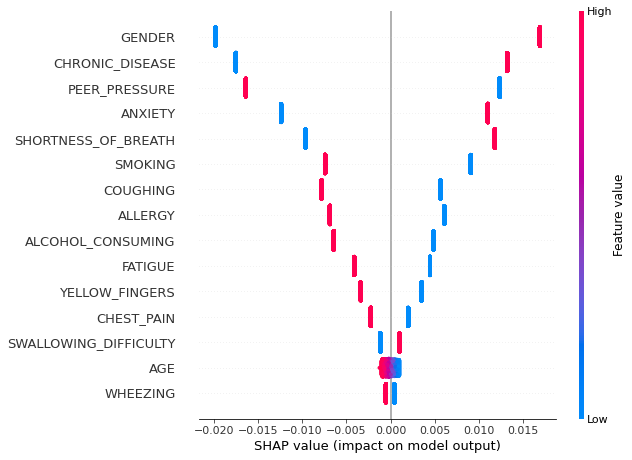

In [ ]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

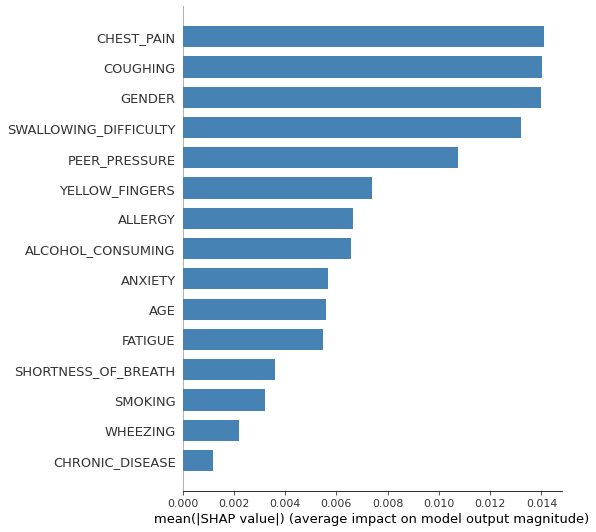

In [ ]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

*SHAP analysis for Tree based model*

In [ ]:
explainer = shap.TreeExplainer(tbm)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

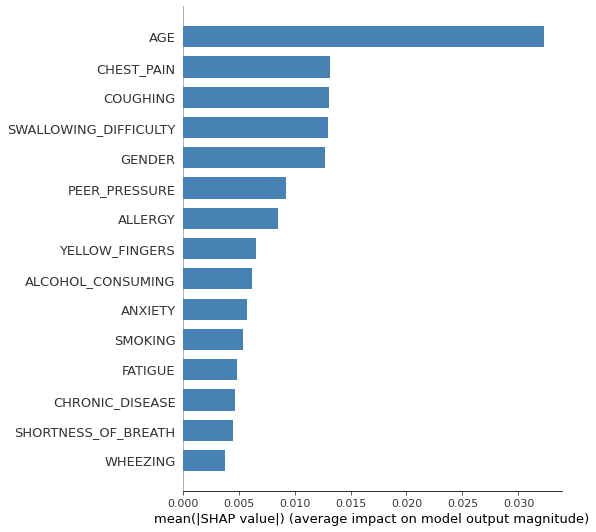

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

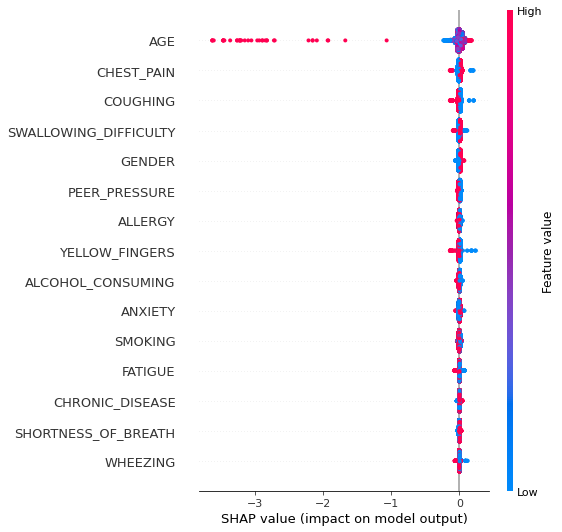

In [ ]:
shap.summary_plot(shap_values, x_train)

References : 
https://towardsdatascience.com/tagged/model-interpretability

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/

https://towardsdatascience.com/shap-a-reliable-way-to-analyze-your-model-interpretability-874294d30af6

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.